In [1]:
# Duplicate this template, write your scryfall query here and then run the notebook
QUERY = "t:creature sort:edhrec"
LIMIT = 100

In [2]:
import mtgstats.scryfall.api as api
import mtgstats.cards as c
from mtgstats.analysis import cmc_analysis, color_analysis, subtype_analysis
from mtgstats.plots import cmc_distribution, color_distribution
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
query = api.search(QUERY, limit=LIMIT)
cards = c.parse_cards(query)
data = pd.DataFrame(cards)

In [4]:
data.head()

,name,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,rarity,edhrec_rank
0,Solemn Simulacrum,{4},4.0,Artifact Creature — Golem,"When Solemn Simulacrum enters the battlefield,...",2,2,[],[],[],rare,20
1,Sakura-Tribe Elder,{1}{G},2.0,Creature — Snake Shaman,Sacrifice Sakura-Tribe Elder: Search your libr...,1,1,[G],[G],[],common,36
2,Eternal Witness,{1}{G}{G},3.0,Creature — Human Shaman,"When Eternal Witness enters the battlefield, y...",2,1,[G],[G],[],uncommon,37
3,Llanowar Elves,{G},1.0,Creature — Elf Druid,{T}: Add {G}.,1,1,[G],[G],[],common,48
4,Birds of Paradise,{G},1.0,Creature — Bird,Flying\n{T}: Add one mana of any color.,0,1,[G],[G],[Flying],rare,58


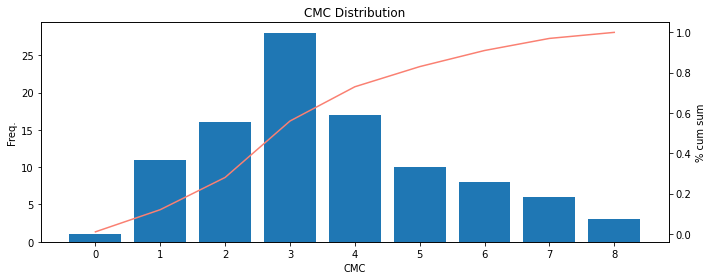

In [5]:
cmc_distribution(cards)

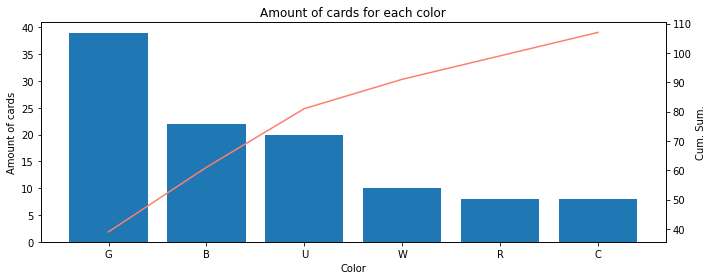

In [6]:
color_distribution(cards)

In [7]:
type_analysis = subtype_analysis(cards)
type_series = pd.Series(type_analysis)
type_series.sort_values()

Illusion         1
Dryad            1
Soldier          1
Elder            1
God              1
Centaur          1
Treefolk         1
Nymph            1
Sphinx           1
Incarnation      1
Angel            1
Drake            1
Elephant         1
Vedalken         1
Artificer        1
Cat              1
Demon            1
Myr              1
Ally             1
Elk              1
Giant            1
Shapeshifter     2
Goblin           2
Horror           2
Dinosaur         2
Scout            2
Monk             2
Praetor          2
Golem            2
Ooze             2
Knight           2
Naga             2
Aetherborn       2
Warrior          2
Dragon           2
Bird             3
Snake            3
Construct        3
Rogue            3
Spirit           3
Cleric           3
Beast            3
Pirate           3
Vampire          4
Elemental        4
Merfolk          4
Zombie           4
Shaman           7
Wizard          13
Druid           15
Elf             17
Human           21
dtype: int64

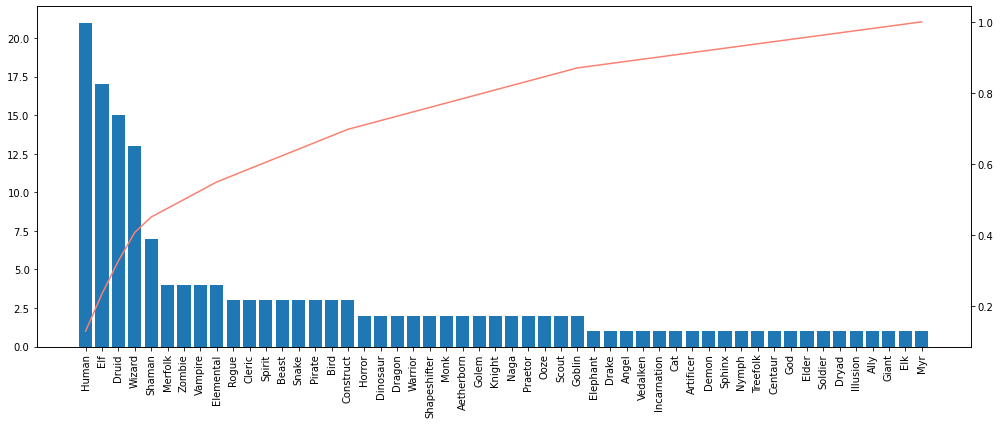

In [8]:
fig, ax = plt.subplots(figsize = (14, 6))

sorted_series = type_series.sort_values(ascending=False)


ax.bar(range(sorted_series.size), sorted_series)
ax.set(
    xticks = range(sorted_series.size),
    xticklabels= sorted_series.index
)
ax.tick_params(axis='x', rotation=90)

cumsum_ax = ax.twinx()
cumsum_ax.plot(sorted_series.cumsum()/sorted_series.sum(), c='salmon')

fig.tight_layout()